In [7]:
import json

In [8]:
file_path = "./save/11/12/exp_12_9_7/"
sta_results = json.load(open(file_path+"val_sta_results.json","r"))

#### 分析答案结果
    得到结果 1. 正确与否
            2. 得分情况

In [9]:
import json
import os
import pickle
from PIL import Image, ImageDraw ,ImageFont
import matplotlib.pyplot as plt
import numpy as np
import h5py
split = {'train':'train','val':'val','test':'test'}

class Question(object):
    
    def __init__(self, dataset):
        super(Question,self).__init__()
        self.split = split[dataset]
        self.questions = json.load(open('/home/data/textvqa/TextVQA_0.5_'+self.split+'.json','r'))['data']
        
    def get_question(self, index = 0, show = False):
        ocr_tokens = self.questions[index]['ocr_tokens']
        question = self.questions[index]['question']
        question_tokens = self.questions[index]['question_tokens']
        ocr_info = self.questions[index]['ocr_info']
        image_id = self.questions[index]['image_id']
        
        image_size = (self.questions[index]['image_width'], self.questions[index]['image_height'])
        image_classes = self.questions[index]['image_classes']
        question_id = self.questions[index]['question_id']
        if self.split not in ['val','train']:
            if show:
                print(question)
                draw_image(self.split,image_id)
            return image_id, image_size, question, question_id, ocr_tokens, ocr_info
        else :
            answers = self.questions[index]['answers']
            if show:
                print("question", question)
                print("answers", answers)
                draw_image(self.split,image_id)
            return image_id, image_size, question, question_id, answers, ocr_tokens, ocr_info

    def get_question_by_question_id(self, question_id, show=False):
        
        for i in range(len(self.questions)):
            if self.questions[i]['question_id']==question_id:
                return self.get_question(i, show)
        print("Can't find this question")
        return None
        
    def length(self):
        return len(self.questions)

def draw_image(dataset, image_id):
    image_dir = '/home/data/textvqa/'+('train' if dataset == 'train' or dataset == 'val' else 'test')+'_images/'
    image=Image.open(image_dir+image_id+'.jpg')
    draw = ImageDraw.Draw(image)
#     for i in range(bb.shape[0]):
#         at1 = x_in_top(i,ind[:,0]) 
#         at2 = x_in_top(i,ind[:,1])
#         if at1 or at2:
#             color = get_color()
#         else:
#             continue
#         draw.rectangle((bb[i][0]*image.width,bb[i][1]*image.height,bb[i][2]*image.width,bb[i][3]*image.height), outline=color,width=3)
#     image.save(save_dir+str(index)+'_'+image_name)
    plt.figure(figsize=(10,10))
    plt.imshow(image)
val_set = Question('val')

question what does it say in the bottom right corner?
answers ['postcode', 'postcode', 'postcode', 'postcode', 'postcode', 'postcode', 'postcode', 'post code', 'postcode', 'recycle symbol']
Results:  False
Prediction answer:  aig
Answer source:  ocr
Tokens:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ['nls4', 'Cengeal', 'aig', 'ก1s4', 'scom']


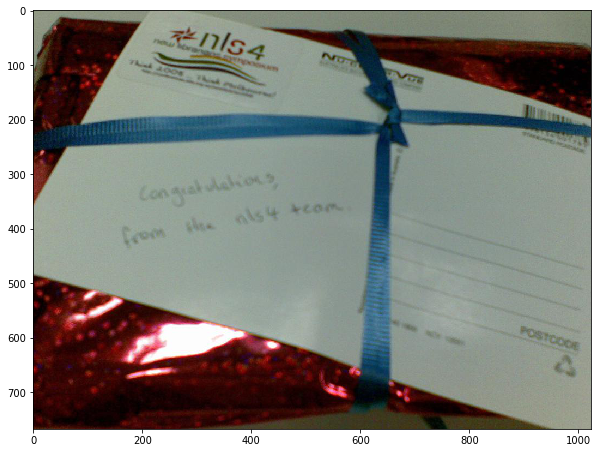

In [10]:
i = 70
image_id, image_size, question, question_id, answers, ocr_tokens, ocr_info = val_set.get_question_by_question_id(sta_results[i]["question_id"], True)
print("Results: ", sta_results[i]['predict answer'] in answers)
print("Prediction answer: ", sta_results[i]['predict answer'])
print("Answer source: ", sta_results[i]['answer source'])
print("Tokens: ", sta_results[i]['label'][-50:], ocr_tokens)

In [11]:
!cp -r ./save/1/exp_1_5_1/ ./best_model/

In [15]:
# !CUDA_VISIBLE_DEVICES=0 python run.py --config options/al/exp_1_15_8.yaml --is_train True